In [242]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Read CSV files 

In [243]:
#Read CSV files 
brands_url = 'https://drive.google.com/file/d/10LA8xPcde93VfAWwLZf9TdzJFmMayXoj/view?usp=sharing'
brands_path ='https://drive.google.com/uc?export=download&id='+ brands_url.split('/')[-2]

orderlines_url = 'https://drive.google.com/file/d/1BtreuM2YphfHKv7DUTQDfKAWwqRpw71m/view?usp=sharing'
orderlines_path = 'https://drive.google.com/uc?export=download&id='+ orderlines_url.split('/')[-2]

orders_url = 'https://drive.google.com/file/d/1ClDTMgPUK3Ue8lZA4F9ccm2GGJS4VqXX/view?usp=sharing'
orders_path = 'https://drive.google.com/uc?export=download&id='+ orders_url.split('/')[-2]

products_url = 'https://drive.google.com/file/d/1UGI2eAtkZswSkfoViA4oZAoEaMuuDHBc/view?usp=sharing'
products_path = 'https://drive.google.com/uc?export=download&id='+ products_url.split('/')[-2]


In [244]:

brands = pd.read_csv(brands_path)
orderlines = pd.read_csv(orderlines_path)
orders = pd.read_csv(orders_path)
products = pd.read_csv(products_path)

# Created required dataframe 

In [245]:
# merge table products and orderlines with sku column
sku_joined = pd.merge(products, orderlines, how = 'inner', on = 'sku')


In [246]:
# calulate discount percentage 
sku_joined['discount_num'] = sku_joined['price'] - sku_joined['unit_price']
sku_joined['discount'] = ((1 - (sku_joined['unit_price'] / sku_joined['price'])) * 100).round(2)

In [247]:
# merge sku_joined with orders table 
df_merged = pd.merge(sku_joined, orders, how = 'inner', left_on = 'id_order', right_on = 'order_id')


In [248]:
df_compare = df_merged['order_id'] != df_merged['id_order']

In [249]:
# selected completed state  orders 
df_completed = df_merged[df_merged.state == 'Completed']
df_completed.shape

(61742, 21)

In [250]:
# drop unwanted columns
df = df_completed.drop(columns = ['desc', 'type', 'max_price_orderlines', 'product_id', 'check_orders_x', 'order_id', 'total_paid', 'check_orders_y', 'unit_price'])

In [251]:
df.created_date = df.date
df['date'] = pd.to_datetime(df['date']).dt.date

In [252]:
# Categories according to price , low price product = 0 - 100, Middel price product = 101 - 1000, High price product = 1001 - 5000, High end product = < 5000
df['category'] = ''
df['category'] = df.total_price.apply(lambda x: 'low' if x <= 100 else 'middle' if x <=1000 else 'high' if x <= 5000 else 'high_end')

In [253]:
df

,sku,name,price,id,id_order,product_quantity,date,total_price,discount_num,discount,created_date,state,category
0,RAI0007,Silver Rain Design mStand Support,59.99,1121326,300551,1,2017-01-02,54.99,5.00,8.33,2017-01-02 13:34:30,Completed,low
13,RAI0007,Silver Rain Design mStand Support,59.99,1149253,310820,1,2017-01-17,49.99,10.00,16.67,2017-01-17 09:37:43,Completed,low
17,RAI0007,Silver Rain Design mStand Support,59.99,1149773,311042,1,2017-01-17,49.99,10.00,16.67,2017-01-17 15:55:39,Completed,low
24,RAI0007,Silver Rain Design mStand Support,59.99,1181573,324568,1,2017-02-15,54.99,5.00,8.33,2017-02-15 13:36:16,Completed,low
26,RAI0007,Silver Rain Design mStand Support,59.99,1188189,327565,1,2017-02-22,54.99,5.00,8.33,2017-02-22 13:01:25,Completed,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292284,NKI0012-A,Open - Nokia 36mm HR Steel Smartwatch Smart Cl...,189.95,1641146,523687,1,2018-03-09,126.99,62.96,33.15,2018-03-09 10:35:52,Completed,middle
292299,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",29.99,1512677,470360,1,2017-12-23,22.99,7.00,23.34,2017-12-23 18:21:21,Completed,low
292309,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",29.99,1573942,496040,1,2018-01-22,19.99,10.00,33.34,2018-01-22 13:11:08,Completed,low
292317,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",29.99,1499671,464365,1,2017-12-16,22.99,7.00,23.34,2017-12-16 14:38:57,Completed,low


In [254]:
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.strftime('%Y-%m')

In [255]:
# total revenue per month
df_for_lineplot_revenue = df.groupby(['year_month']).agg({'total_price' : 'sum'})
df_for_lineplot_revenue

,total_price
year_month,
2017-01,1156623.74
2017-02,601500.22
2017-03,115696.37
2017-04,484910.43
2017-05,627104.51
2017-06,682422.74
2017-07,1112950.99
2017-08,711286.80
2017-09,854602.08


Text(0.5, 1.0, 'Total revenue per month')

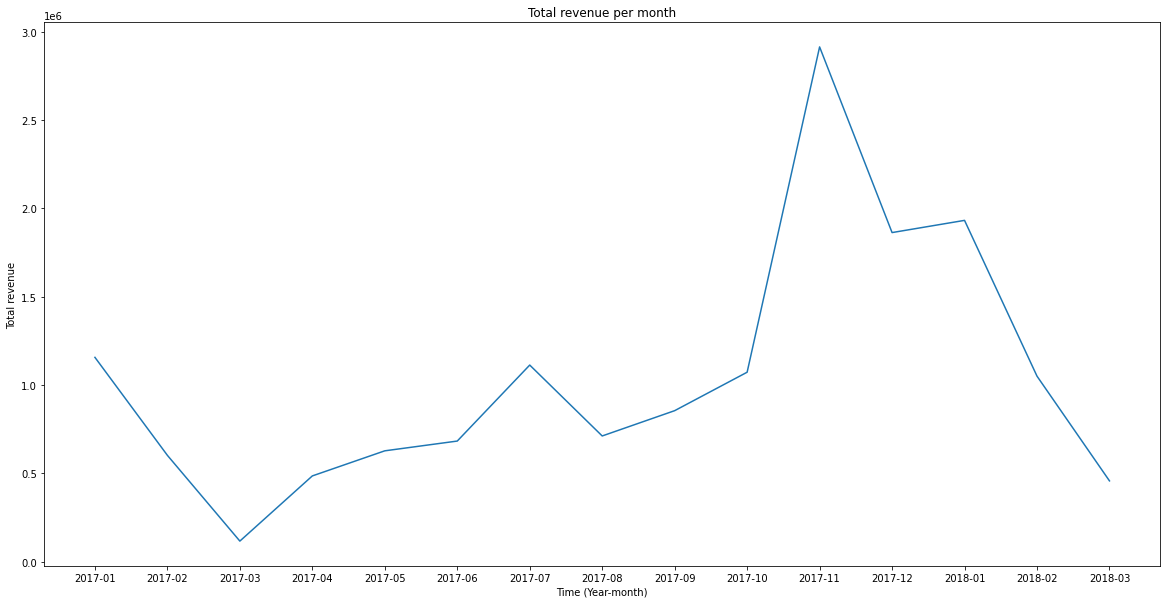

In [256]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_for_lineplot_revenue,x='year_month',y= 'total_price');
plt.xlabel('Time (Year-month)')
plt.ylabel('Total revenue')
plt.title('Total revenue per month')
#(Revenue definition: total amount of income generated by the sale of goods )

In [257]:
# total revenue by categories
df_for_lineplot_revenue_categories= df.groupby(['year_month', 'category']).agg({'total_price' : 'sum'})
df_for_lineplot_revenue_categories

total_price
year_month category             
2017-01    high        500601.82
           high_end      5577.98
           low         187906.77
           middle      462537.17
2017-02    high        257410.60
           low          77887.53
           middle      266202.09
2017-03    high         73417.94
           high_end     13364.96
           low           7453.75
           middle       21459.72
2017-04    high        235428.40
           low          64498.17
           middle      184983.86
2017-05    high        283971.70
           low          68076.23
           middle      275056.58
2017-06    high        375445.87
           low          51391.72
           middle      255585.15
2017-07    high        463581.95
           high_end     13894.97
           low         114520.00
           middle      520954.07
2017-08    high        295590.36
           high_end     16753.16
           low          81837.63
           middle      317105.65
2017-09    high        444217.15
           high_end      7335.59
           low          71219.70
           middle      331829.64
2017-10    high        483036.58
           high_end     11036.39
           low          97898.86
           middle      480471.71
2017-11    high       1305075.85
           high_end     48638.94
           low         220399.87
           middle     1341267.78
2017-12    high        805817.70
           high_end     27074.46
           low         169696.28
           middle      860937.65
2018-01    high        976642.37
           high_end     55844.47
           low         174871.40
           middle      725285.20
2018-02    high        481842.91
           high_end     15690.28
           low         112954.83
           middle      439610.64
2018-03    high        225989.55
           high_end      5998.00
           low          51095.61
           middle      173785.31

Text(0.5, 1.0, 'Total revenue per month by category')

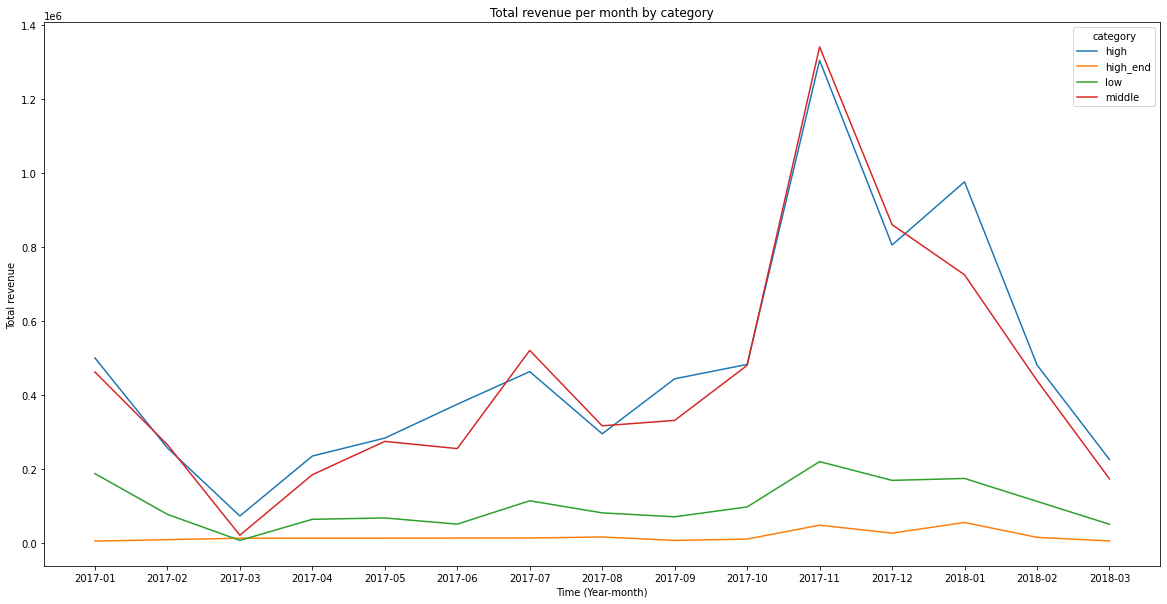

In [258]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_for_lineplot_revenue_categories,x='year_month',y= 'total_price',hue='category');
plt.xlabel('Time (Year-month)')
plt.ylabel('Total revenue')
plt.title('Total revenue per month by category')

In [259]:
# total number of orders
df_for_lineplot_orders = df.groupby('year_month').agg({'id_order' : 'nunique'})
df_for_lineplot_orders

,id_order
year_month,
2017-01,5110
2017-02,2235
2017-03,205
2017-04,1641
2017-05,1893
2017-06,1607
2017-07,3430
2017-08,2347
2017-09,2191


Text(0.5, 1.0, 'Total number of orders per month')

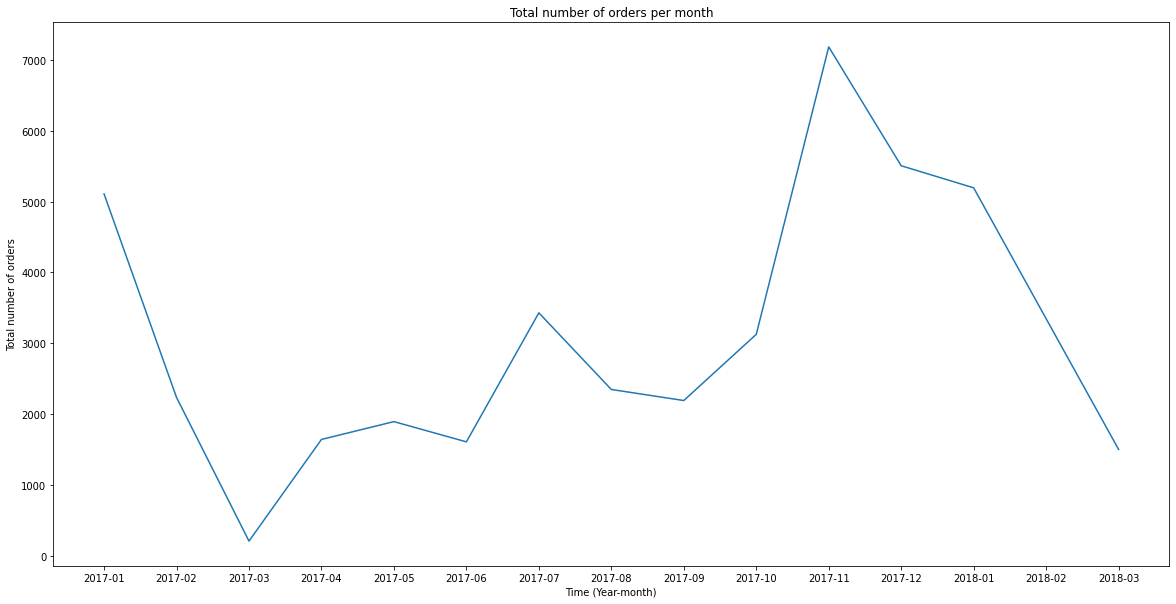

In [260]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_for_lineplot_orders,x='year_month',y= 'id_order');
plt.xlabel('Time (Year-month)')
plt.ylabel('Total number of orders')
plt.title('Total number of orders per month')

In [261]:
# total number of orders by categories
df_for_lineplot_orders_categories = df.groupby(['year_month', 'category']).agg({'id_order' : 'nunique'})
df_for_lineplot_orders_categories

id_order
year_month category          
2017-01    high           232
           high_end         1
           low           3679
           middle        1557
2017-02    high           124
           low           1463
           middle         846
2017-03    high            29
           high_end         2
           low            130
           middle          68
2017-04    high           110
           low           1110
           middle         561
2017-05    high           149
           low           1122
           middle         806
2017-06    high           172
           low            920
           middle         677
2017-07    high           208
           high_end         2
           low           2087
           middle        1445
2017-08    high           147
           high_end         3
           low           1419
           middle         989
2017-09    high           222
           high_end         1
           low           1293
           middle         939
2017-10    high           243
           high_end         2
           low           1808
           middle        1386
2017-11    high           643
           high_end         6
           low           3671
           middle        3752
2017-12    high           449
           high_end         5
           low           3173
           middle        2362
2018-01    high           522
           high_end        10
           low           3149
           middle        2047
2018-02    high           253
           high_end         3
           low           2023
           middle        1383
2018-03    high           114
           high_end         1
           low            949
           middle         568

Text(0.5, 1.0, 'Total number of orders per month by category')

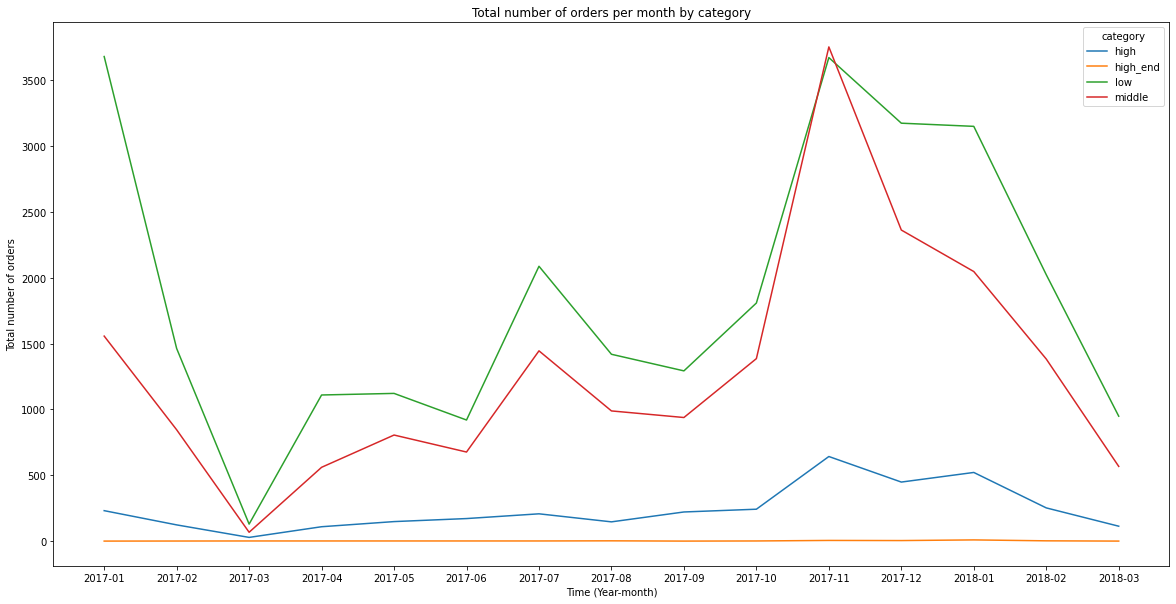

In [262]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_for_lineplot_orders_categories,x='year_month',y= 'id_order',hue='category');
plt.xlabel('Time (Year-month)')
plt.ylabel('Total number of orders')
plt.title('Total number of orders per month by category')


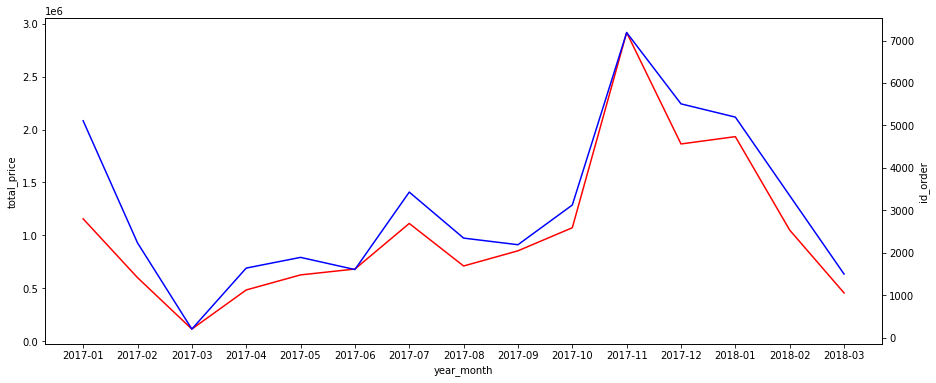

In [263]:
# co-relation between number of orders and total revenue 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x='year_month',  y='total_price', color='r',  data=df_for_lineplot_revenue, ax=ax, 
            )
ax2 = ax.twinx()
sns.lineplot(x='year_month',y='id_order', color='b',  data=df_for_lineplot_orders, ax=ax2,  
              )
ax.set_title('', fontsize = 17)
plt.show()